In [1]:
import pandas as pd
import os
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import cheby2, filtfilt, cheby1, cheby2, zpk2sos, sosfiltfilt
from scipy.stats import skew

In [5]:
#essai de filtre sur un seul fichier csv de RR
root_example=r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data\Physiological\2ea4\2ea4_Baseline_rr_data.csv"
data=pd.read_csv(root_example)


In [5]:
list_time = pd.date_range("20240403", periods = len(data), freq = "10ms")  #creation d'une base de temps pour le filtrage

In [6]:
time= []
for date in list_time:
    time_str = date.strftime("%M:%S:%f")
    time.append(time_str[:-4])
time

['00:00:00',
 '00:00:01',
 '00:00:02',
 '00:00:03',
 '00:00:04',
 '00:00:05',
 '00:00:06',
 '00:00:07',
 '00:00:08',
 '00:00:09',
 '00:00:10',
 '00:00:11',
 '00:00:12',
 '00:00:13',
 '00:00:14',
 '00:00:15',
 '00:00:16',
 '00:00:17',
 '00:00:18',
 '00:00:19',
 '00:00:20',
 '00:00:21',
 '00:00:22',
 '00:00:23',
 '00:00:24',
 '00:00:25',
 '00:00:26',
 '00:00:27',
 '00:00:28',
 '00:00:29',
 '00:00:30',
 '00:00:31',
 '00:00:32',
 '00:00:33',
 '00:00:34',
 '00:00:35',
 '00:00:36',
 '00:00:37',
 '00:00:38',
 '00:00:39',
 '00:00:40',
 '00:00:41',
 '00:00:42',
 '00:00:43',
 '00:00:44',
 '00:00:45',
 '00:00:46',
 '00:00:47',
 '00:00:48',
 '00:00:49',
 '00:00:50',
 '00:00:51',
 '00:00:52',
 '00:00:53',
 '00:00:54',
 '00:00:55',
 '00:00:56',
 '00:00:57',
 '00:00:58',
 '00:00:59',
 '00:00:60',
 '00:00:61',
 '00:00:62',
 '00:00:63',
 '00:00:64',
 '00:00:65',
 '00:00:66',
 '00:00:67',
 '00:00:68',
 '00:00:69',
 '00:00:70',
 '00:00:71',
 '00:00:72',
 '00:00:73',
 '00:00:74',
 '00:00:75',
 '00:00:76',

In [109]:

rr_signal = pd.DataFrame({"Time" : time, "Amplitude": data["RR"]})
rr_signal
print(type(rr_signal))

NameError: name 'time' is not defined

In [108]:
signal_filtered=nk.signal_filter(rr_signal['Amplitude'].values, sampling_rate=250, lowcut=0.1, highcut=0.35, method="butterworth", order=2, show=False)
signal_filtered

NameError: name 'rr_signal' is not defined

In [7]:
rr_signal_filtered=pd.DataFrame({"Time":time,"non_filtered":data["RR"], "filtered": signal_filtered})
print(rr_signal)
print(rr_signal_filtered)

NameError: name 'time' is not defined

<Axes: xlabel='Time'>

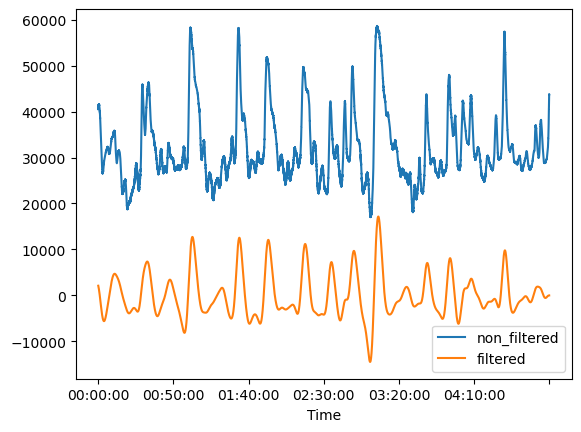

In [10]:
rr_signal_filtered.plot(x='Time', y=['non_filtered', 'filtered'])



In [2]:
root_onfile = r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data_rr_filtered\2ea4\2ea4_Video1_rr_filtered.csv"

In [3]:
destination_folder= r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole"

In [54]:
rr_data = pd.read_csv(root_onfile,  sep=';')

In [43]:
def creation_base_time(data):
    time=[0]
    tmp = 0
    for i in range(len(data)-1):
        tmp = i*60/len(data)
        time.append(tmp)
    return time

In [6]:
def cheby2_bandpass_filter(raw_PPG, fL, highcut, Fn, N, rp=1):
    """N = 4  # Ordre 
    fL = 0.1  # Fréquence de coupure basse
    fH = 0.35  # Fréquence de coupure haute
    Fn = 500  # Fréquence d'échantillonnage"""
    
    # Calcul de la fréquence de Nyquist
    nyq = 0.5 * Fn
    
    # Conversion des fréquences de coupure normalisées
    fL_n = fL / nyq
    fH_n = highcut / nyq
    
    # Conception du filtre de Chebyshev type II
    sos = cheby2(N, 20, [fL_n, fH_n], 'bandpass', analog=False, output='sos')
    
    
    # Filtrage des données
    filtered_PPG = sosfiltfilt(sos, raw_PPG)
    return filtered_PPG

In [44]:
def filtering_technic(rr_data):
    time=creation_base_time(rr_data)
    signal_filtered_250=nk.signal_filter(rr_data['rr_non_filtered'].values, sampling_rate=250, lowcut=0.1, highcut=0.35, method="butterworth", order=2, show=False)
    signal_filtered_500=nk.signal_filter(rr_data['rr_non_filtered'].values, sampling_rate=500, lowcut=0.1, highcut=0.35, method="butterworth", order=2, show=False)
    
    signal_neurokit_250, info_neurokit_250 = nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=250)
    signal_neurokit_clean_250 = np.array(signal_neurokit_250['RSP_Clean'])
    signal_neurokit_500, info_neurokit_500 =nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=500)
    signal_neurokit_clean_500 = np.array(signal_neurokit_500['RSP_Clean'])

    signal_filtered_chebyii = cheby2_bandpass_filter(rr_data['rr_non_filtered'].values, 0.1, 0.35, 500, 4, rp=1)

    
    rr_signal_filtered=pd.DataFrame({"Time":time, "rr_non_filtered":rr_data['rr_non_filtered'], "rr_clean_neurokit250": signal_neurokit_clean_250, "rr_clean_neurokit500": signal_neurokit_clean_500, "signal_filtered_250": signal_filtered_250, "signal_filtered_500": signal_filtered_500, 'signal_filtered_cheby2': signal_filtered_chebyii})
    #filename = f"{id}_{task}_rr_filtered.csv"
    #rr_signal_filtered.to_csv(os.path.join(completeDestination, filename), sep=';', index=False)

    return rr_signal_filtered

In [68]:
rr_signal_filtered= filtering_technic(rr_data)
rr_signal_filtered

,Time,rr_non_filtered,rr_clean_neurokit250,rr_clean_neurokit500,signal_filtered_250,signal_filtered_500,signal_filtered_cheby2
0,0.000000,38785,-519.256746,1779.867493,-4025.320451,5006.710268,5756.364587
1,0.000000,38767,-528.498858,1771.763620,-4003.829083,5028.417600,5771.304651
2,0.000690,38696,-537.847524,1763.621685,-3982.128472,5050.128915,5785.686835
3,0.001379,38644,-547.271550,1755.451871,-3960.218371,5071.843954,5800.230882
4,0.002069,38708,-556.741231,1747.264524,-3938.098543,5093.562454,5815.906575
...,...,...,...,...,...,...,...
86995,59.995862,32845,-41.791177,-11.260908,0.071033,-0.053624,244.658835
86996,59.996552,32862,-36.639186,-9.740998,0.060436,-0.045669,244.708628
86997,59.997241,32900,-31.818876,-8.347840,0.050946,-0.038536,244.968607
86998,59.997931,32903,-27.339921,-7.079373,0.042503,-0.032182,244.878806


In [9]:
def affichage_filter(rr_data):
    #rr_data.plot(x='Time', y=['rr_filtered', 'rr_non_filtered'])
    #rr_data.plot(x='Time', y=['rr_non_filtered'])
    plt.plot(rr_data['Time'], rr_data['rr_non_filtered'], color='b')
    plt.plot(rr_data['Time'], rr_data['rr_clean_neurokit250'], color='r')
    plt.legend(['Non filtré', 'Neurokit sample à 250'])
    plt.show()
    
    plt.plot(rr_data['Time'], rr_data['rr_non_filtered'], color='b')
    plt.plot(rr_data['Time'], rr_data['rr_clean_neurokit500'], color='r')
    plt.legend(['Non filtré', 'Neurokit sample à 500'])
    plt.show()

    plt.plot(rr_data['Time'], rr_data['rr_non_filtered'], color='b')
    plt.plot(rr_data['Time'], rr_data['signal_filtered_250'], color='r')
    plt.legend(['Non filtré', 'Butterworth sample à 250'])
    plt.show()

    plt.plot(rr_data['Time'], rr_data['rr_non_filtered'], color='b')
    plt.plot(rr_data['Time'], rr_data['signal_filtered_500'], color='r')
    plt.legend(['Non filtré', 'Butterworth sample à 500'])
    plt.show()

    plt.plot(rr_data['Time'], rr_data['rr_non_filtered'], color='b')
    plt.plot(rr_data['Time'], rr_data['signal_filtered_cheby2'], color='r')
    plt.legend(['Non filtré', 'Chebychev type 2 à 500'])
    plt.show()

    
    

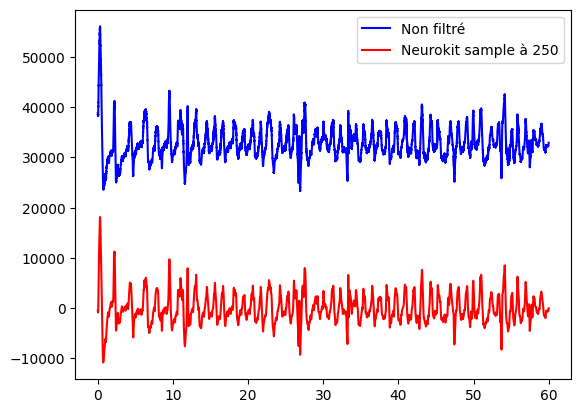

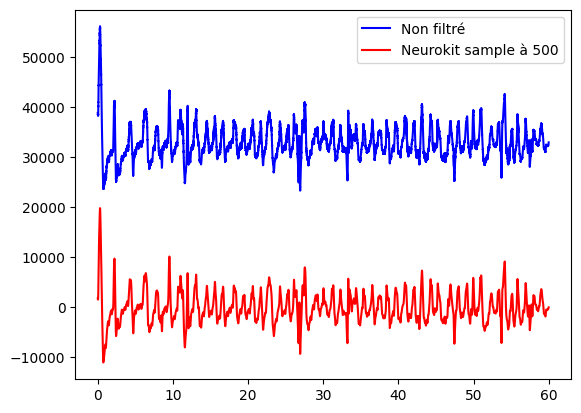

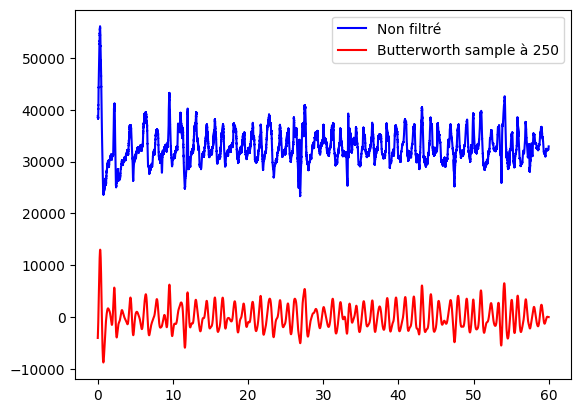

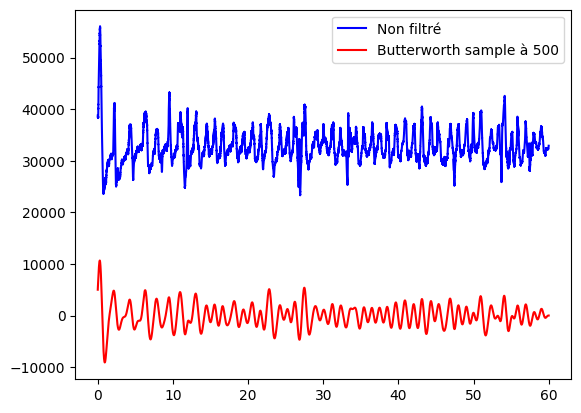

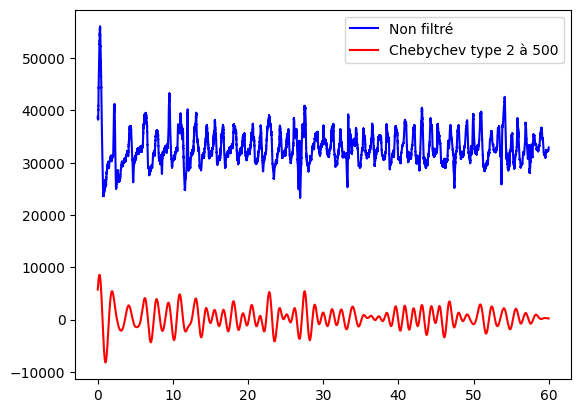

In [319]:
affichage_filter(rr_signal_filtered)

In [10]:
def calcul_skewness(rr_data, name_column):
    skewness = skew(np.array(rr_data[name_column]))
    return skewness
    

In [11]:
def feature_statistic(rr_data):
    features_extract = pd.DataFrame(columns=['Technic', 'Average', 'Max', 'Min', 'Median', 'Std'])  # DataFrame to store the EDA data

    for column in range (1, rr_data.shape[1]):
        rr_mean = rr_data.iloc[:, column].mean()
        rr_max=rr_data.iloc[:,column].max()
        rr_min = rr_data.iloc[:,column].min()
        rr_median = rr_data.iloc[:,column].median()
        rr_std = rr_data.iloc[:,column].std()
        skewness=calcul_skewness(rr_data, rr_data.columns[column])
        # Crée un DataFrame avec la moyenne des valeurs RR pour chaque fichier
        df = pd.DataFrame({'Technic': rr_data.columns[column], 'Average': rr_mean, 'Max': rr_max, 'Min': rr_min, 'Median': rr_median, 'Std': rr_std, 'Skew' : skewness}, index=[0])
        features_extract = pd.concat([features_extract, df], ignore_index=True)
      
    return features_extract

In [12]:
features_extract=feature_statistic(rr_signal_filtered)
features_extract

C:\Users\lexan\AppData\Local\Temp\ipykernel_5160\3376175298.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_extract = pd.concat([features_extract, df], ignore_index=True)


,Technic,Average,Max,Min,Median,Std,Skew
0,rr_non_filtered,32828.983333,56048,23313,32314.000000,3263.738332,1.289823
1,rr_clean_neurokit250,20.688120,18131.26145,-10794.012471,-500.486622,2962.691232,0.803177
2,rr_clean_neurokit500,-2.104953,19791.970376,-11004.023636,-479.875420,3111.341218,0.869797
3,signal_filtered_250,23.162735,12998.375216,-8753.089927,-280.667745,2377.116149,0.550518
4,signal_filtered_500,19.840062,10663.861822,-9103.334092,-107.037211,2199.157261,0.257705
5,signal_filtered_cheby2,345.944283,8576.202405,-8183.066274,308.896183,2015.136339,0.022010


In [16]:
"""def cheby1_bandpass_filter(data, lowcut, highcut, fs, order=5, rp=1):
        nyq = 0.5 * fs
        low = lowcut 
        high = highcut 
        b, a = signal.cheby1(order, rp=rp, Wn=[low, high], btype="bandpass")
        y = signal.filtfilt(b, a, data)
        return y"""

'def cheby1_bandpass_filter(data, lowcut, highcut, fs, order=5, rp=1):\n        nyq = 0.5 * fs\n        low = lowcut \n        high = highcut \n        b, a = signal.cheby1(order, rp=rp, Wn=[low, high], btype="bandpass")\n        y = signal.filtfilt(b, a, data)\n        return y'

In [17]:
def affichage_neurokit(rr_data):
    signal_neurokit, info_neurokit=nk.rsp_process(rr_data['rr_non_filtered'].values, sampling_rate=500)
    nk.rsp_plot(signal_neurokit, info_neurokit)

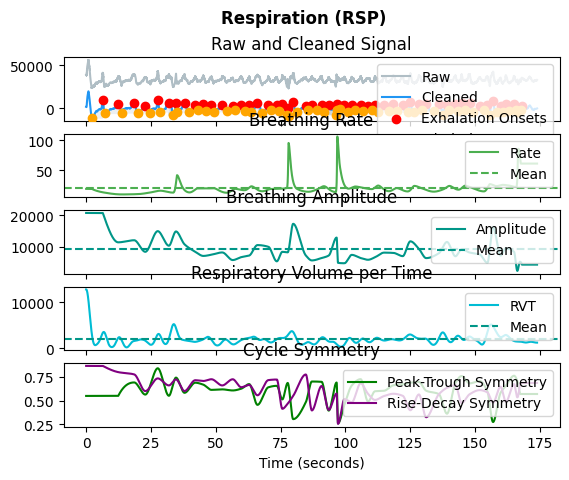

In [18]:
affichage_neurokit(rr_data)

In [64]:
def downsampling(rr_data, name_column):
    """signal=np.array(rr_data[name_column])
    start_time = '2022-01-01 00:00:00'
    freq = '20ms'
    periods=len(rr_data)
    time_index = pd.period_range(start=start_time, periods=periods, freq=freq)

    rr_data.set_index(time_index, inplace=True)
    rr_data.index.name = 'Time' 
    
    downsampled_signal = rr_data[name_column].resample('500ms').mean()
    downsampled_df = pd.DataFrame({'Signal': downsampled_signal})

    downsampled_signal.plot()"""

    #rr_data['Time'] = pd.to_datetime(rr_data['Time'])
    rr_data.set_index('Time', inplace=True)

    # Downsampling avec une fréquence de 500ms (2 Hz)
    downsampled_data = rr_data.resample('500ms').mean()

    # Tracer le signal original et le signal downsampled
    #plt.plot(rr_data.index, rr_data[name_column], color='b', label='Original Signal')
    plt.plot(downsampled_data.index, downsampled_data[name_column], color='r', label='Downsampled Signal')
    
    
    plt.legend([name_column, 'Enhanced signal'])
    plt.show() 
    return downsampled_data

In [ ]:
"""downsampled_signal.plot()

In [346]:
def peak_enhancement(rr_data, name_column, rb=4000, l_lt=-2000):
    
    # Calculating the range of the signal
    signal=np.array(rr_data[name_column])
    signal_range = max(signal) - min(signal)
    
    # Applying the peak enhancement formula
    enhanced_signal = rb * ((rr_data[name_column] - min(signal)) / signal_range) + l_lt
    plt.plot(rr_data['Time'], enhanced_signal, color='r')
    plt.plot(rr_data['Time'], signal, color='b')
    
    plt.legend([name_column, 'Enhanced signal'])
    plt.show() 
    
    return enhanced_signal


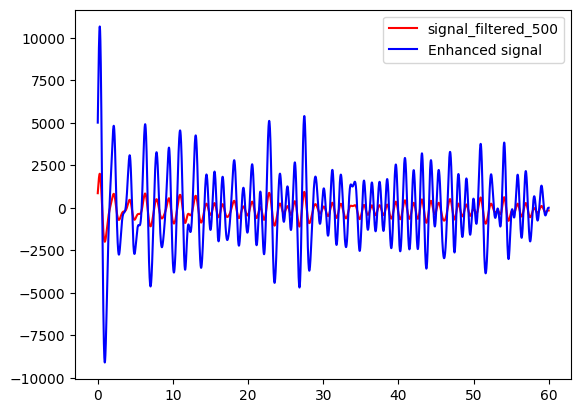

In [347]:
peak_signal=peak_enhancement(rr_signal_filtered, 'signal_filtered_500')

In [182]:
def detrend(rr_data, name_column):
    detrended_filtered=signal.detrend(rr_data[name_column])
    plt.plot(rr_data['Time'], rr_data[name_column], color='b')
    plt.plot(rr_data['Time'], detrended_filtered, color='r')
    plt.legend([name_column, 'Detrended signal'])
    plt.show()    
    return detrended_filtered

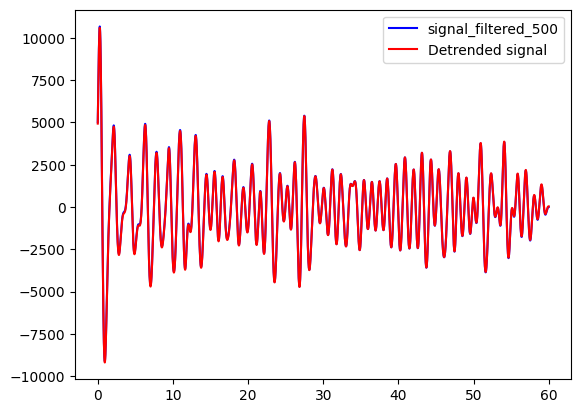

In [326]:
detrended_filtered=detrend(rr_signal_filtered, 'signal_filtered_500')

In [36]:
def smooth(rr_data, name_column):
    smoothing = rr_data[name_column].rolling(window=80).mean()
    plt.plot(rr_data['Time'], rr_data[name_column], color='b')
    plt.plot(rr_data['Time'], smoothing, color='r')
    plt.legend([name_column, 'Smoothing signal'])
    plt.show()    

    
    

In [66]:
def smooth_0_20(rr_data, name_column):
    smoothing = rr_data[name_column].rolling(window=0.1).mean()
    filtered_data = rr_data[(rr_data['Time'] >= 0) & (rr_data['Time'] <= 20)]
    filtered_smoothing = smoothing[(smoothing.index >= 0) & (smoothing.index <= 20)]

    # Tracer les données originales et la moyenne glissante
    plt.plot(filtered_data['Time'], filtered_data[name_column], color='b', label='Original Signal')
    plt.plot(filtered_smoothing.index, filtered_smoothing, color='r', label='Smoothing')
    plt.show()

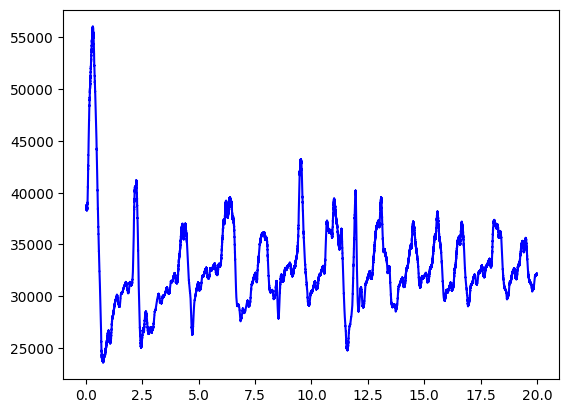

In [38]:
smotthing=smooth_0_20(rr_signal_filtered, 'rr_non_filtered')

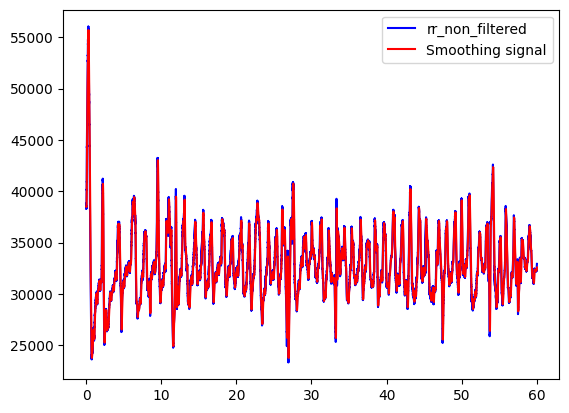

In [69]:
smoothing_filtered=smooth(rr_signal_filtered, 'rr_non_filtered')